In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [3]:
df = pd.read_csv("../../dados/faturamento.csv")

C:\Users\tulio\AppData\Local\Temp\ipykernel_12740\1885305779.py:1: DtypeWarning: Columns (2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../dados/faturamento.csv")


ROB MES MARCA

C:\Users\tulio\AppData\Local\Temp\ipykernel_24856\577030315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Mes'] = df_2024['Data Faturamento'].dt.month
C:\Users\tulio\AppData\Local\Temp\ipykernel_24856\577030315.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ajustar automaticamente para não cortar conteúdo


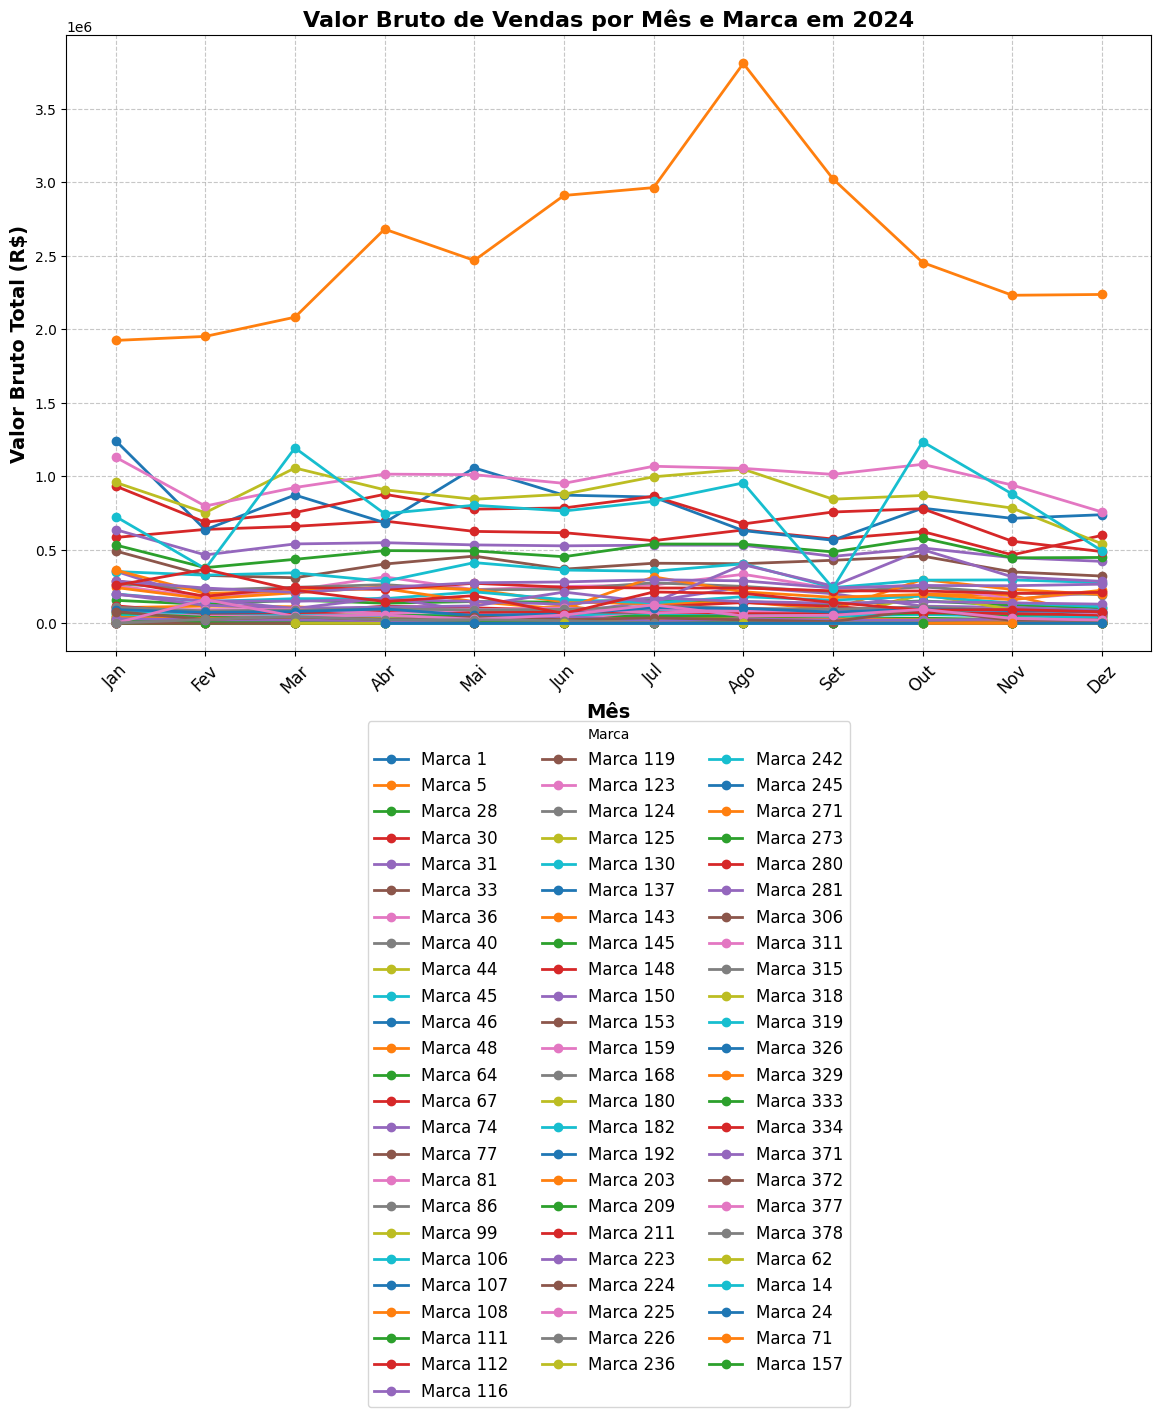

In [ ]:
# Converter colunas para os tipos corretos
df['Data Faturamento'] = pd.to_datetime(df['Data Faturamento'],dayfirst=True)
df['AnoComercial'] = df['AnoComercial'].astype(int)
df['VlrBruto'] = df['VlrBruto'].astype(float)

# Filtrar apenas os dados de 2024
df_2024 = df[df['AnoComercial'] == 2024]

# Criar uma nova coluna para o mês de faturamento
df_2024['Mes'] = df_2024['Data Faturamento'].dt.month

# Agrupar por Mês e Marca, somando o valor bruto
df_monthly_brand_sales = df_2024.groupby(['Mes', 'CodMarca'])['VlrBruto'].sum().reset_index()

# Plotar o gráfico de linha para cada marca
plt.figure(figsize=(14, 8))  # Aumenta o tamanho do gráfico

# Plotar a linha para cada marca com cores e estilos diferentes
for marca in df_monthly_brand_sales['CodMarca'].unique():
    marca_data = df_monthly_brand_sales[df_monthly_brand_sales['CodMarca'] == marca]
    plt.plot(marca_data['Mes'], marca_data['VlrBruto'], marker='o', linestyle='-', label=f'Marca {marca}', linewidth=2)

# Adicionar título e rótulos com fontes maiores e mais legíveis
plt.title('Valor Bruto de Vendas por Mês e Marca em 2024', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=14, fontweight='bold')
plt.ylabel('Valor Bruto Total (R$)', fontsize=14, fontweight='bold')

# Adicionar marcações no eixo X (Meses de Janeiro a Dezembro) com uma rotação
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45, fontsize=12)

# Adicionar grade com estilo mais sutil
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar a posição da legenda para que fique abaixo do gráfico
plt.legend(title='Marca', loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar automaticamente para não cortar conteúdo
plt.show()


In [28]:

# Converter a coluna de data
df['Data Faturamento'] = pd.to_datetime(df['Data Faturamento'], dayfirst=True)

# Agrupar por UF e somar o valor bruto das vendas
df_sales_by_uf = df.groupby('UF')['VlrBruto'].sum().reset_index()

# Dicionário de coordenadas aproximadas de cada UF para exibição
uf_coordinates = {
    'AC': [-8.7743, -70.6483],
    'AL': [-9.5715, -36.7820],
    'AP': [1.4118, -51.7714],
    'AM': [-3.1190, -60.8120],
    'BA': [-12.5791, -41.1006],
    'CE': [-5.4984, -39.3206],
    'DF': [-15.7801, -47.9292],
    'ES': [-20.3155, -40.3128],
    'GO': [-16.6780, -49.2535],
    'MA': [-5.3097, -44.4443],
    'MT': [-12.6376, -56.1026],
    'MS': [-20.5033, -54.6203],
    'MG': [-18.5123, -44.5550],
    'PA': [-5.8604, -52.3294],
    'PB': [-7.2295, -35.7817],
    'PR': [-24.1232, -51.9787],
    'PE': [-8.2791, -35.4699],
    'PI': [-7.1150, -42.3283],
    'RJ': [-22.9068, -43.1729],
    'RN': [-5.7945, -36.6141],
    'RS': [-30.0346, -51.2177],
    'RO': [-11.1945, -62.9550],
    'RR': [2.2552, -60.7740],
    'SC': [-27.5954, -48.5480],
    'SP': [-23.5505, -46.6333],
    'SE': [-10.9472, -37.0731],
    'TO': [-10.2517, -48.3013]
}

# Agrupar os 5 marcas mais vendidas por UF
top_brands_by_uf = df.groupby(['UF', 'CodMarca'])['VlrBruto'].sum().reset_index()
top_brands_by_uf = top_brands_by_uf.sort_values(by='VlrBruto', ascending=False)

# Limitar para as 5 marcas mais vendidas por UF
top_5_brands_dict = {}
for uf in top_brands_by_uf['UF'].unique():
    top_5_brands_dict[uf] = top_brands_by_uf[top_brands_by_uf['UF'] == uf].head(5)

# Criar o mapa
mapa_brasil = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar Cluster de Marcadores
marker_cluster = MarkerCluster().add_to(mapa_brasil)

# Plotar o marcador de vendas por UF
for _, row in df_sales_by_uf.iterrows():
    uf = row['UF']
    vendas = row['VlrBruto']
    latitude, longitude = uf_coordinates.get(uf, [0, 0])  # Coordenadas aproximadas da UF
    brand_list = "<br>".join([f"Marca {row['CodMarca']}: R$ {row['VlrBruto']:,.2f}" for _, row in top_5_brands_dict[uf].iterrows()])
    folium.Marker(
        location=[latitude, longitude],
        popup=f"UF: {uf}<br>Total Vendas: R$ {vendas:,.2f}<br>Top 5 Marcas:<br>{brand_list}",
        tooltip=f"UF: {uf}",
    ).add_to(marker_cluster)

# Exibir o mapa
mapa_brasil


ROB x UNIDADE

C:\Users\tulio\AppData\Local\Temp\ipykernel_12740\158053331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Mes'] = df_2024['Data Faturamento'].dt.month


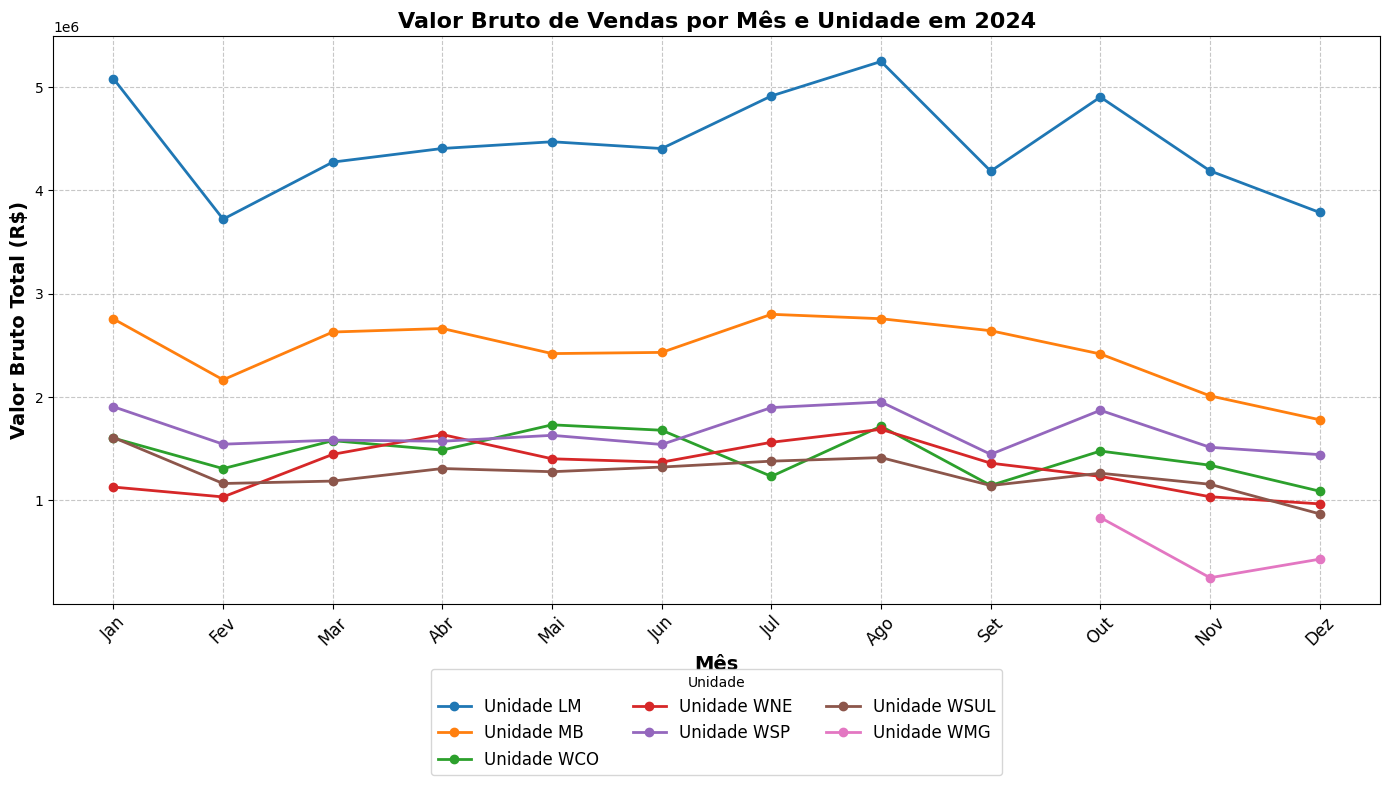

In [31]:
# Converter colunas para os tipos corretos
df['Data Faturamento'] = pd.to_datetime(df['Data Faturamento'],dayfirst=True)
df['AnoComercial'] = df['AnoComercial'].astype(int)
df['VlrBruto'] = df['VlrBruto'].astype(float)

# Filtrar apenas os dados de 2024
df_2024 = df[df['AnoComercial'] == 2024]

# Criar uma nova coluna para o mês de faturamento
df_2024['Mes'] = df_2024['Data Faturamento'].dt.month

# Agrupar por Mês e Marca, somando o valor bruto
df_monthly_brand_sales = df_2024.groupby(['Mes', 'Unidade'])['VlrBruto'].sum().reset_index()

# Plotar o gráfico de linha para cada marca
plt.figure(figsize=(14, 8))  # Aumenta o tamanho do gráfico

# Plotar a linha para cada marca com cores e estilos diferentes
for marca in df_monthly_brand_sales['Unidade'].unique():
    marca_data = df_monthly_brand_sales[df_monthly_brand_sales['Unidade'] == marca]
    plt.plot(marca_data['Mes'], marca_data['VlrBruto'], marker='o', linestyle='-', label=f'Unidade {marca}', linewidth=2)

# Adicionar título e rótulos com fontes maiores e mais legíveis
plt.title('Valor Bruto de Vendas por Mês e Unidade em 2024', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=14, fontweight='bold')
plt.ylabel('Valor Bruto Total (R$)', fontsize=14, fontweight='bold')

# Adicionar marcações no eixo X (Meses de Janeiro a Dezembro) com uma rotação
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45, fontsize=12)

# Adicionar grade com estilo mais sutil
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar a posição da legenda para que fique abaixo do gráfico
plt.legend(title='Unidade', loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)

# Mostrar o gráfico
plt.tight_layout()  # Ajustar automaticamente para não cortar conteúdo
plt.show()